In [7]:
# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.stattools import adfuller

In [8]:
# Chargement des données
data = pd.read_excel("/content/Dataset.xlsx", thousands=',')

In [9]:
# Conversion des colonnes numériques en format numérique
numeric_columns = ['COURS_CLOTURE', 'COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

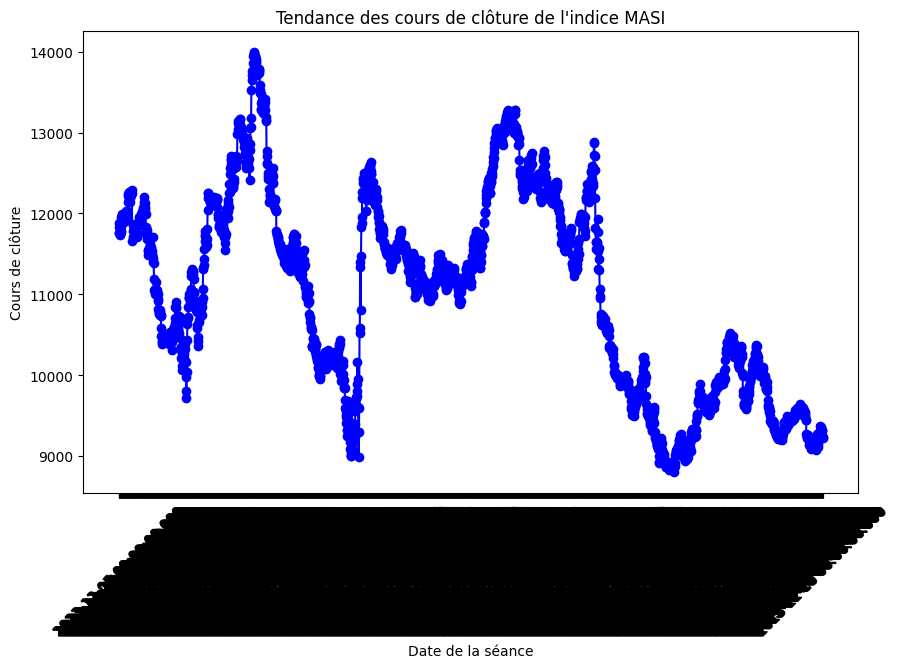

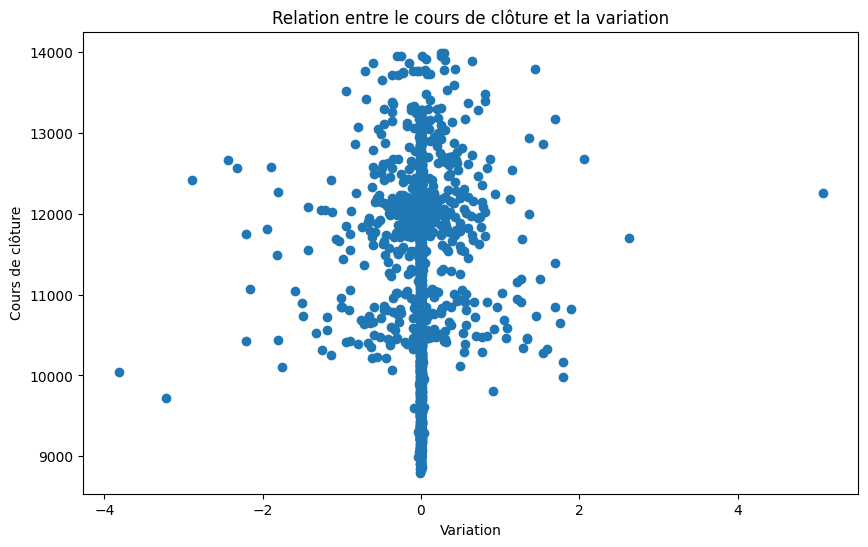

In [10]:
# 1. Analyse Exploratoire des Données (AED)
# Visualisation des tendances temporelles
plt.figure(figsize=(10, 6))
plt.plot(data['SEANCE'], data['COURS_CLOTURE'], marker='o', linestyle='-', color='b')
plt.title('Tendance des cours de clôture de l\'indice MASI')
plt.xlabel('Date de la séance')
plt.ylabel('Cours de clôture')
plt.xticks(rotation=45)
plt.show()

# Ajoutez ici d'autres visualisations pour explorer les relations avec d'autres variables.
# Visualisation de la relation avec d'autres variables
plt.figure(figsize=(10, 6))
# Exemple : Relation entre le cours de clôture et la variation
plt.scatter(data['VARIATION'], data['COURS_CLOTURE'])
plt.title('Relation entre le cours de clôture et la variation')
plt.xlabel('Variation')
plt.ylabel('Cours de clôture')
plt.show()

In [11]:
# 2. Prétraitement des Données
# Vérifiez la stationnarité des séries temporelles
# Appliquez la différenciation si nécessaire
# Exemple de vérification de la stationnarité (Dickey-Fuller Test)
result = adfuller(data['COURS_CLOTURE'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -2.0390766544816357
p-value: 0.26970641736113066
Critical Values: {'1%': -3.43313335512918, '5%': -2.8627696375034364, '10%': -2.567424589414422}


In [12]:
# 3. Sélection de Modèle
# Utilisation d'une régression linéaire simple
X = data[['COURS_PLUS_HAUT', 'COURS_PLUS_BAS', 'COURS_OUVERTURE', 'COURS_VEILLE', 'VARIATION']]
y = data['COURS_CLOTURE']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Analyse de l'importance des coefficients
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importance': model.coef_})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
print('Importance des coefficients :')
print(feature_importance)

Importance des coefficients :
          Variable  Importance
4        VARIATION   29.332403
1   COURS_PLUS_BAS    0.844508
0  COURS_PLUS_HAUT    0.724906
3     COURS_VEILLE   -0.029573
2  COURS_OUVERTURE   -0.540812


In [13]:
# 4. Entraînement et Test du Modèle
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [14]:
# 5. Évaluation du Modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error : {mse}')

# Coefficients du modèle
print('Coefficients du modèle :', model.coef_)
print('Intercept du modèle :', model.intercept_)

Mean Squared Error : 939.5544230740938
Coefficients du modèle : [ 0.72490569  0.84450759 -0.54081168 -0.02957345 29.33240294]
Intercept du modèle : 18.1921191204583


In [15]:
# 6. Amélioration du Modèle - Utilisation d'un modèle plus complexe (par exemple, forêts aléatoires)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

# Prédiction sur l'ensemble de test avec le meilleur modèle RF
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Évaluation du modèle RF
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest) : {mse_rf}')

# Paramètres du meilleur modèle RF
print('Meilleurs paramètres du modèle RF :', grid_search.best_params_)

Mean Squared Error (Random Forest) : 2307.6131501154487
Meilleurs paramètres du modèle RF : {'max_depth': None, 'n_estimators': 200}
